# **Proyecto Final Ingenier√≠a Software III**


*   **Kevin Dannie Guzm√°n Duran**
*   **Juan Diego Roa Porras**

**Repo**: https://github.com/JuanRoa785/PF-Software-III/


# **Introducci√≥n**

Este proyecto se enfoc√≥ en el an√°lisis emp√≠rico del comportamiento de una aplicaci√≥n al ser desplegada en distintos entornos. Se utiliz√≥ como caso de estudio el proyecto final de la asignatura Entornos de Programaci√≥n, evaluando su rendimiento tanto en Docker como en Kubernetes.

Las pruebas se llevaron a cabo en equipos con recursos limitados, proporcionados por la universidad, y tambi√©n en un entorno con mayor capacidad de c√≥mputo. Se variaron factores como el n√∫mero de r√©plicas y la cantidad de nodos activos dentro del cl√∫ster de Kubernetes, con el fin de observar c√≥mo estos elementos afectan el desempe√±o de la aplicaci√≥n.

Aunque se trata de un an√°lisis emp√≠rico, se procur√≥ mantener condiciones consistentes en cada experimento para garantizar resultados comparables. Las m√©tricas obtenidas sirvieron como base para las conclusiones que se presentan m√°s adelante.



# **Objetivos**

El principal objetivo de este proyecto es aplicar de manera pr√°ctica los conocimientos adquiridos a lo largo del curso, configurando y utilizando activamente el cl√∫ster de m√°quinas virtuales provisto al inicio del semestre. Se busc√≥ desplegar aplicaciones de forma eficiente y sencilla utilizando tanto Docker como Kubernetes.

Adicionalmente, con el prop√≥sito de fortalecer la capacidad anal√≠tica y mejorar la toma de decisiones t√©cnicas, se llevaron a cabo pruebas de carga bajo diferentes configuraciones de la aplicaci√≥n. Estas pruebas permitieron comparar emp√≠ricamente las alternativas de despliegue disponibles, aprovechando los recursos limitados del entorno, y as√≠ fundamentar con datos s√≥lidos cu√°l opci√≥n resulta m√°s conveniente.

# **Not An Ebook**

<p align="justify">
<b>Not An Ebook</b> es la aplicaci√≥n desarrollada como proyecto final para la asignatura de Entornos de Programaci√≥n en la Universidad Industrial de Santander. Su prop√≥sito es establecer los fundamentos de un sistema de comercio electr√≥nico enfocado en la venta de libros f√≠sicos. La plataforma permite a los usuarios registrarse, consultar informaci√≥n clave de los libros, como sinopsis, autor, g√©nero literario, n√∫mero de p√°ginas, entre otros, y simular una compra ingresando su direcci√≥n.

Asimismo, los administradores del emprendimiento pueden acceder a reportes de ventas utilizando filtros simples e intuitivos. Con el objetivo de escalar la aplicaci√≥n, se contempla la implementaci√≥n de funcionalidades avanzadas de gesti√≥n de inventario, permitiendo que el sistema evolucione hacia una soluci√≥n de informaci√≥n en tiempo real que proporcione a los administradores datos relevantes sobre la rentabilidad del negocio.
</p>

## **Tecnolog√≠as Utilizadas**

*   **Backend:** Spring Boot
*   **Frontend:** Angular
*   **Database:** PostgreSQL
*   **Gesti√≥n de Imagenes:** Cloudinary

## **Software en Ejecuci√≥n**

<p align="center">
  <img src="https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Assets/notanebook.gif" width="800"/>
</p>








---

# **Configuraci√≥n de Despliegue**

La configuraci√≥n del despliegue se bas√≥ en el uso de **variables de entorno**, lo que permiti√≥ adaptar la ejecuci√≥n del software a diferentes entornos modificando √∫nicamente sus valores. Gracias a este enfoque, la aplicaci√≥n pudo ejecutarse y ser accesible tanto de forma local como en un cluster de m√°quinas virtuales sin la necesidad de realizar cambios en el c√≥digo fuente.

## **Database (PostgreSQL)**
La configuraci√≥n de la base de datos se mantuvo constante en todos los despliegues, utilizando las siguientes variables de entorno:

```dockerfile
ENV POSTGRES_USER=postgres
ENV POSTGRES_PASSWORD=adminPostgres
ENV POSTGRES_DB=not_an_ebook
```
Es importante destacar que el valor de `POSTGRES_DB` no debe ser modificado, ya que el backend tiene este nombre de base de datos codificado de forma fija. En caso de cambiarlo, ser√° necesario ajustar el archivo `application.properties` del backend, reconstruir la imagen con `docker build` y, para mantener la coherencia en los despliegues, actualizar la imagen correspondiente en **Docker Hub**.

Aunque el servicio de PostgreSQL expone el puerto est√°ndar **5432**, este fue mapeado al puerto **5435** en Docker y al **30543** en Kubernetes para evitar conflictos y facilitar el acceso seg√∫n el entorno de ejecuci√≥n.

## **Backend (Spring Boot)**

A continuaci√≥n se presentan las variables de entorno definidas en el archivo `application.properties` del backend:

```java
spring.datasource.url=jdbc:postgresql://${DB_HOST}:${DB_PORT}/not_an_ebook
spring.datasource.username=${DB_USER}
spring.datasource.password=${DB_PASS}
spring.jpa.show-sql=true
server.port = 8081

spring.servlet.multipart.max-file-size=10MB
spring.servlet.multipart.max-request-size=10MB

cloudinary.cloud-name=${CLOUD_NAME}
cloudinary.api-key=${CLOUD_API_KEY}
cloudinary.api-secret=${CLOUD_API_SECRET}
```

Estas variables permiten establecer la conexi√≥n con la base de datos PostgreSQL y habilitar el servicio de Cloudinary para la gesti√≥n de las portadas de los libros. Adem√°s, se configura el puerto del servidor y se definen l√≠mites para la carga de archivos, lo que facilita una configuraci√≥n flexible y adaptable a diferentes entornos de despliegue.

## **Frontend (Angular -> Nginx)**

El despliegue de la aplicaci√≥n frontend desarrollada en Angular present√≥ ciertos desaf√≠os adicionales. Uno de los principales fue la necesidad de definir una √∫nica variable de entorno: la URL base para realizar peticiones al backend. Esta configuraci√≥n se complica especialmente en entornos distribuidos como Kubernetes, donde no se puede predecir en qu√© nodo estar√°n desplegadas las r√©plicas del backend en un momento dado.

Para resolver esta problem√°tica, se configur√≥ y utiliz√≥ un ingress controller, el cual act√∫a como proxy inverso para enrutar las peticiones entrantes. La configuraci√≥n espec√≠fica se defini√≥ en el archivo ingress-config.yaml.

Adem√°s, para simplificar el proceso de creaci√≥n de la imagen del frontend, se utiliz√≥ el comando:

```shell
npm run build --omit=dev
```

Este comando compila la aplicaci√≥n en su versi√≥n de producci√≥n. Durante el proceso de construcci√≥n de la imagen Docker, el archivo `index.html` est√° dise√±ado para consumir un archivo `config.js`, el cual se genera din√°micamente mediante el script `docker-entrypoint.sh.` Este script sobrescribe `config.js` con los valores apropiados seg√∫n la estrategia de despliegue. Su l√≥gica principal es la siguiente:

```shell
if [ "$DEPLOY_TYPE" = "kubernetes" ]; then
  echo "window.API_URL = '${API_URL}';" > $CONFIG_PATH
else
  echo "window.API_URL = 'http://${BACKEND_HOST}:${BACKEND_PORT}';" > $CONFIG_PATH
fi
```
En esta l√≥gica se observa que, para despliegues con Docker, es necesario especificar el host y el puerto del backend (por ejemplo: `10.6.101.100:8081`). En cambio, para Kubernetes, basta con usar el alias definido en el Ingress (en este caso: `backend.local`), ya que el enrutamiento es gestionado autom√°ticamente dentro del cl√∫ster.

## **Docker Hub**
Una vez verificado que las im√°genes funcionaban correctamente tanto en entornos Docker como en Kubernetes, se realiz√≥ el push final de estas al repositorio de Docker Hub, asegurando as√≠ su disponibilidad para los diferentes escenarios de despliegue.

<p align="center">
  <img src="https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Assets/dockerhub.png" width="700"/>
</p>

Cabe resaltar que, debido a la similitud estructural entre esta aplicaci√≥n y la desplegada en el Reto 2, fue posible reutilizar gran parte de los `Dockerfile` y archivos `.yaml` utilizados anteriormente, lo cual facilit√≥ y agiliz√≥ el proceso de configuraci√≥n y despliegue.



---



# **Despliegue de Not An Ebook**

```shell
#Clonar el repositorio
git clone https://github.com/JuanRoa785/PF-Software-III.git

#Ubicarse en el directorio del proyecto
cd PF-Software-III
```

## **Docker**
En caso de no ejecutar la aplicaci√≥n de forma completamente local, es necesario actualizar en el archivo `docker-compose.yml` la variable de entorno `BACKEND_HOST`, asign√°ndole la IP de la m√°quina virtual donde se desplegar√°n los contenedores.

Para levantar la aplicaci√≥n, ejecuta los siguientes comandos:

```shell
docker compose up -d
docker ps # Verifica que los tres contenedores est√©n en ejecuci√≥n
```

Una vez desplegado, los servicios estar√°n disponibles en las siguientes direcciones:

*   **Fronted:** `http://IP_MAQUINA:4200`
*   **Backend:** `http://IP_MAQUINA:8081`
*   **Database:** `IP_MAQUINA:30543`

Para detener la aplicaci√≥n, simplemente ejecuta:
```shell
docker compose down
```

---

## **Kubernetes**
Para desplegar la aplicaci√≥n en Kubernetes, primero aseg√∫rate de estar ubicado en la carpeta `k8s/configs` y habilita el complemento `ingress` con los siguientes comandos:

```shell
microk8s kubectl enable ingress
cd k8s/configs
```
> üí° Si tu cl√∫ster cuenta con varios nodos y se crea una r√©plica del controlador `ingress` por nodo, es recomendable editar su deployment para limitarlo a una sola r√©plica por cl√∫ster, evitando conflictos

Luego, aplica los `ConfigMaps` y `Secrets` necesarios para preparar tanto el despliegue como el Ingress:
```shell
microk8s kubectl apply -f .
```
### **Configuraci√≥n de alias en la m√°quina local**
Para acceder a la aplicaci√≥n o realizar pruebas desde la m√°quina local (por ejemplo, con JMeter o mediante navegador), debes crear un alias llamado `backend.local` apuntando a la IP del nodo donde se est√° ejecutando `ingress`. Para identificar la IP:
```shell
microk8s kubectl describe pods -n ingress
```

Busca una secci√≥n similar a esta en el resultado:
```shell
Node: roa-pc/192.168.1.12
```

Luego, edita el archivo de hosts:
```shell
sudo nano /etc/hosts
```

Y a√±ade la siguiente l√≠nea:
```lua
192.168.1.12    backend.local
```
### **Despliegue de los servicios**
Finalmente, regresa a la carpeta principal (k8s/) y ejecuta los archivos de deployment y servicios:
```shell
cd ../
microk8s kubectl apply -f .
```

Una vez desplegados, los servicios estar√°n disponibles en los siguientes puertos:

*   **Frontend:** `http://IP_MAQUINA:30420`
*   **Backend:** `http://IP_MAQUINA:30081`
*   **Database:** `IP_MAQUINA:30543`





---




# **Metodolog√≠a de Generaci√≥n de Carga con JMeter**

Antes de abordar la prueba de estr√©s realizada con JMeter, es importante describir el estado inicial de la base de datos. Independientemente de la herramienta de despliegue utilizada, la aplicaci√≥n se inicializa con los siguientes datos por defecto:

*   **75** Productos (Libros)
*   **100** Usuarios
*   **100** Direcciones
*   **1500** Ventas
*   **3700** Detalles de Ventas

<p align="center">
  <img src="https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Assets/database.gif" width="800"/>
</p>

---

El endpoint seleccionado para la prueba fue el del reporte individual, ya que es, sin duda, el que mayor carga genera tanto para el backend como para la base de datos. Este endpoint recibe los siguientes par√°metros:

*  **cliente**: nombre del cliente, utilizado para filtrar las ventas en las que haya participado como comprador.
*  **fechaInferior**: l√≠mite inferior del rango de fechas para mostrar las ventas.
*  **fechaInferior**: l√≠mite superior del rango de fechas para mostrar las ventas.
*  **totalDesc**:  par√°metro que permite ordenar las ventas seg√∫n su total.

En la interfaz del frontend, este formulario se visualiza de la siguiente manera:
<p align="center">
  <img src="https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Assets/reporte.png" width="800"/>
</p>

Y su configuraci√≥n equivalente en JMeter se muestra as√≠:
<p align="center">
  <img src="https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Assets/jmeter.png" width="800"/>
</p>

Para estas pruebas, se dej√≥ el par√°metro cliente como cadena vac√≠a, se fij√≥ el **l√≠mite inferior** en el 1 de enero de 2020 y el **l√≠mite superior** en la fecha actual. De este modo, se garantiza que se consulten las **1500** ventas registradas, asegurando as√≠ que la carga generada por el endpoint sea significativa.



---



# **Obtenci√≥n de los datos**

Para garantizar la fiabilidad de los resultados durante las pruebas de carga, se sigui√≥ una metodolog√≠a rigurosa desde la m√°quina local encargada de ejecutarlas. El primer paso fue detener cualquier servicio innecesario que pudiera interferir en el rendimiento, incluyendo los entornos de **Docker** y **MicroK8s**, mediante los siguientes comandos:

```shell
sudo systemctl stop docker
sudo microk8s stop
```

Posteriormente, se accedi√≥ a las m√°quinas del cl√∫ster de Kubernetes y se minimizaron los procesos en ejecuci√≥n, deteniendo todos los deployments, servicios o contenedores que pudieran estar activos y consumir recursos.

En la m√°quina local, se asegur√≥ que no se estuviera ejecutando ning√∫n otro proceso aparte de JMeter, una consola con conexi√≥n SSH al cl√∫ster, y el navegador Brave con solo un par de pesta√±as abiertas.

Adem√°s, fue necesario ajustar los l√≠mites de consumo de recursos por parte de JMeter. Para ello, se edit√≥ el archivo `setenv.sh` con las siguientes configuraciones:

```shell
sudo nano /opt/apache-jmeter-5.6.3/bin/setenv.sh
export HEAP="-Xms2g -Xmx4g -XX:MaxMetaspaceSize=512m"
```

Cabe destacar que, durante toda la ejecuci√≥n de las pruebas, el uso de recursos de la m√°quina local no super√≥ en ning√∫n momento el **50%**, lo cual garantiza que los resultados obtenidos no estuvieron condicionados por cuellos de botella a nivel de hardware.

## **Fase 1**
Al igual que en la m√°quina local, se detuvo el servicio de MicroK8s utilizando el comando previamente mencionado. Adem√°s, se procedi√≥ a limpiar completamente el entorno de Docker, eliminando todos los contenedores e im√°genes existentes con los siguientes comandos:

```shell
docker stop $(docker ps -a -q)
docker rm $(docker ps -a -q)
docker rmi $(docker images -q)
```
Para cada configuraci√≥n se realizaron cuatro experimentos, cuyos resultados fueron posteriormente promediados. Las configuraciones evaluadas fueron las siguientes:

|# Replicas | Ramp up | # Samples|
|-----------|---------|----------|
|     1     |    50   |   100    |
|     1     |   100   |   300    |
|     1     |   100   |   700    |
|     1     |   100   |   1000   |

## **Fase 2**
En esta fase se cambi√≥ de m√°quina dentro del cl√∫ster. Mientras que la Fase 1 se ejecut√≥ en la m√°quina `10.6.101.107`, al finalizar dicha etapa se detuvieron sus servicios de Docker y no se reinici√≥ MicroK8s en ella. Posteriormente, se continu√≥ en la m√°quina `10.6.101.100`, reiniciando el servicio de Kubernetes con el siguiente comando:

```shell
sudo microk8s start
```

Para asegurar que el nodo `107` no participara en esta fase, se verific√≥ que estuviera deshabilitado. Adem√°s, como medida adicional, se lo acordon√≥ con:

```shell
microk8s kubectl cordon student107
```

Cada vez que se modificaba el archivo `pfs-back-deployment.yaml` para cambiar la cantidad de r√©plicas del backend, se comprobaba **que todos los pods se estuvieran ejecutando exclusivamente en la m√°quina 100**.

A diferencia de la Fase 1 y debido a limitaciones de tiempo, en esta fase se realizaron **2 experimentos por configuraci√≥n**. Las configuraciones evaluadas fueron:

|# Replicas | Ramp up | # Samples|
|-----------|---------|----------|
|     1     |    50   |   100    |
|     1     |   100   |   300    |
|     1     |   100   |   700    |
|     1     |   100   |   1000   |
|     2     |    50   |   100    |
|     2     |   100   |   300    |
|     2     |   100   |   700    |
|     2     |   100   |   1000   |
|     3     |    50   |   100    |
|     3     |   100   |   300    |
|     3     |   100   |   700    |
|     3     |   100   |   1000   |

## **Fase 3**

Tras habilitar nuevamente MicroK8s en el nodo `107` y desacordonarlo mediante el siguiente comando:

```shell
microk8s kubectl uncordon student107
```

Se eliminaron los pods desplegados hasta lograr la siguiente distribuci√≥n inicial: **la base de datos ubicada en la m√°quina 107 y la primera r√©plica del backend en la m√°quina 100**. A medida que se aumentaba el n√∫mero de r√©plicas del backend, se verific√≥ que hubiera una **r√©plica por nodo**.

Para las √∫ltimas cuatro configuraciones, en las que se utilizaban **tres r√©plicas del backend**, ya no era relevante en qu√© nodo se desplegaba la tercera r√©plica, ya que inevitablemente uno de los nodos terminar√≠a sobrecargado.

Al igual que en la Fase 2, se evaluaron las mismas **12 configuraciones**, con 2 experimentos por cada una, sumando un total de **24 ejecuciones** en esta fase

## **Fase 4**
En esta fase se plante√≥ un an√°lisis adicional repitiendo un √∫nico experimento por configuraci√≥n, pero con una condici√≥n particular: **la m√°quina que ejecutaba la aplicaci√≥n ten√≠a especificaciones significativamente superiores**, y adem√°s, **JMeter se ejecutaba en esa misma m√°quina**, eliminando as√≠ cualquier latencia de red entre el generador de carga y el sistema bajo prueba.

|Despliegue |# Replicas | Ramp up | # Samples|
|-----------|-----------|---------|----------|
|   Docker  |     1     |    50   |   100    |
|   Docker  |     1     |   100   |   300    |
|   Docker  |     1     |   100   |   700    |
|   Docker  |     1     |   100   |   1000   |
|  Microk8s |     1     |    50   |   100    |
|  Microk8s |     1     |   100   |   300    |
|  Microk8s |     1     |   100   |   700    |
|  Microk8s |     1     |   100   |   1000   |

Lamentablemente, los resultados obtenidos fueron inconsistentes, por lo que no se profundiz√≥ su an√°lisis.



---



# **Creaci√≥n del Dataset**
Dado que las m√©tricas de inter√©s estaban disponibles en el **Summary Report de JMeter**, se exportaron y almacenaron en el directorio `Jmeter/Experimentos`, tal como se muestra a continuaci√≥n:

<p align="center">
  <img src="https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Assets/ovwExp.png" width="800"/>
</p>

Como todos los archivos `.csv` generados compart√≠an la misma estructura, se elabor√≥ un script sencillo llamado `formatCSV.sh`. Este script iteraba por cada archivo CSV, extra√≠a √∫nicamente la **segunda l√≠nea** (que contiene los valores de las m√©tricas), y las concatenaba en un √∫nico archivo denominado `resultados.csv`.

Este archivo consolidado sirvi√≥ como punto de partida para el preprocesamiento de los datos, descrito en la siguiente secci√≥n.

# **Tratamiento del Dataset**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultados.csv')

#Creamos un nuevo dataset donde iran los datos tratados
df_tratado = pd.DataFrame()

# Limpiar y convertir la columna 'Error %' a tipo num√©rico
df['Error %'] = df['Error %'].astype(str).str.strip().str.replace('%', '', regex=False)
df['Error %'] = pd.to_numeric(df['Error %'], errors='coerce')

# Eliminar la columna 'Label'
df_numeric = df.drop(columns=["Label"])

#print(df_numeric.dtypes)

df_numeric

# Samples  Average   Min    Max  Std. Dev.  Error %  Throughput  \
0         100     4323  1172  14516    2876.43    0.000     1.58672   
1         100     6147  1723  17035    2509.53    0.000     1.81548   
2         100     2286  1190   4549     504.60    0.000     1.93615   
3         100     3350  1592  16087    2663.07    0.000     1.70625   
4         300    28803  1692  42228    9234.02   24.333     2.22188   
..        ...      ...   ...    ...        ...      ...         ...   
67       1000    11686   839  30038    8610.78    0.200     7.90658   
68        100      982   821   2283     193.19    0.000     1.98484   
69        300      904   836   1007      33.92    0.000     2.98291   
70        700      723   579   1111      79.29    0.000     6.95459   
71       1000    10497   966  30085    5215.79    0.200     8.43270   

    Received KB/sec  Sent KB/sec  Avg. Bytes  
0           8754.20         0.33   5649571.0  
1          10016.27         0.38   5649571.0  
2          10682.03         0.41   5649571.0  
3           9413.66         0.36   5649571.0  
4           9275.84         0.47   4274970.5  
..              ...          ...         ...  
67         43534.60         1.64   5638272.9  
68         10950.66         0.42   5649571.0  
69         16457.18         0.63   5649571.0  
70         38369.56         1.47   5649571.0  
71         46431.50         1.79   5638272.9  

[72 rows x 10 columns]

In [3]:
#Promediar los 4 experimentos por configuraci√≥n de la fase 1
df_fase1 = df_numeric[0:16]

for i in range(0, len(df_fase1), 4):
    bloque = df_fase1.iloc[i:i+4]
    promedio = bloque.mean()
    df_tratado = pd.concat([df_tratado, promedio.to_frame().T], ignore_index=True)

#df_tratado

#----------------------------------------------------------------------------------

#Promediar los 2 experimentos por cada configuraci√≥n de la fase 2 y 3
df_k8s = df_numeric[16:64]

for i in range(0, len(df_k8s), 2):
    bloque = df_k8s.iloc[i:i+2]
    promedio = bloque.mean()
    df_tratado = pd.concat([df_tratado, promedio.to_frame().T], ignore_index=True)

#df_tratado

#----------------------------------------------------------------------------------

#Concatenar los experimentos de la fase 4 (1 por configuraci√≥n)
df_fase4 = df_numeric[64:]
df_tratado = pd.concat([df_tratado, df_fase4], ignore_index=True)
#df_tratado


In [4]:
# Definir los valores de las columnas de metadatos
fase = [
    1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
    2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
    3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4
]

replicas = [
    1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3,
    1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3,
    1, 1, 1, 1, 1, 1, 1, 1
]

ramp_up = [
    50, 100, 100, 100, 50, 100, 100, 100, 50, 100, 100, 100,
    50, 100, 100, 100, 50, 100, 100, 100, 50, 100, 100, 100,
    50, 100, 100, 100, 50, 100, 100, 100, 50, 100, 100, 100
]

# Crear un DataFrame con esas columnas
metadata_df = pd.DataFrame({
    'Fase': fase,
    '# Replicas': replicas,
    'Ramp up': ramp_up
})

# A√±adir al DataFrame existente
df_tratado.insert(0, 'Ramp up', metadata_df['Ramp up'])
df_tratado.insert(0, '# Replicas', metadata_df['# Replicas'])
df_tratado.insert(0, 'Fase', metadata_df['Fase'])

#df_tratado

In [5]:
#Formatear (redondear) las columnas para que se parezcan al df original:
# Redondear columnas espec√≠ficas
df_tratado['# Samples'] = df_tratado['# Samples'].round(0).astype(int)
df_tratado['Average'] = df_tratado['Average'].round(0).astype(int)
df_tratado['Min'] = df_tratado['Min'].round(0).astype(int)
df_tratado['Max'] = df_tratado['Max'].round(0).astype(int)
df_tratado['Std. Dev.'] = df_tratado['Std. Dev.'].round(2)
df_tratado['Error %'] = df_tratado['Error %'].round(4)
df_tratado['Throughput'] = df_tratado['Throughput'].round(6)
df_tratado['Received KB/sec'] = df_tratado['Received KB/sec'].round(2)
df_tratado['Sent KB/sec'] = df_tratado['Sent KB/sec'].round(2)
df_tratado['Avg. Bytes'] = df_tratado['Avg. Bytes'].round(2)

df_tratado.to_csv('resultadosTratados.csv', index=False)

df_tratado

Fase  # Replicas  Ramp up  # Samples  Average    Min    Max  Std. Dev.  \
0      1           1       50        100     4026   1419  13047    2138.41   
1      1           1      100        300    25866   1785  41482    9980.33   
2      1           1      100        700    32610   3324  44270    7053.61   
3      1           1      100       1000    49765   3665  85493   17008.30   
4      2           1       50        100    16063   4840  24444    5134.28   
5      2           1      100        300    29486   2758  41857    8672.86   
6      2           1      100        700    33719   4909  53165    6409.44   
7      2           1      100       1000    52032   5193  85909   16976.94   
8      2           2       50        100    24705   3708  43416    9427.47   
9      2           2      100        300    35409   3692  69998   10966.79   
10     2           2      100        700    32410   6406  56286    6678.73   
11     2           2      100       1000    31872   9695  60381    5840.96   
12     2           3       50        100    36626   4556  55420   11195.75   
13     2           3      100        300    36378   3087  68877   12606.74   
14     2           3      100        700    33964   6396  61437    9030.51   
15     2           3      100       1000    33034   5909  64982    8245.30   
16     3           1       50        100     7610   3964  13033    1750.42   
17     3           1      100        300    23918   2490  40494   10479.09   
18     3           1      100        700    32512   3404  46216    7430.54   
19     3           1      100       1000    52068  11132  87990   17272.62   
20     3           2       50        100    12925   4389  23086    4736.00   
21     3           2      100        300    30808   1946  45167   10378.17   
22     3           2      100        700    31934   6215  53986    6626.22   
23     3           2      100       1000    31536   5650  50350    5556.92   
24     3           3       50        100     9578   1771  19563    4055.12   
25     3           3      100        300    32039   2003  53384   11937.05   
26     3           3      100        700    33394   4251  55996    8429.19   
27     3           3      100       1000    32508   9646  55104    7200.36   
28     4           1       50        100      956    881   1017      25.42   
29     4           1      100        300      891    818    970      25.16   
30     4           1      100        700      672    546    998      61.13   
31     4           1      100       1000    11686    839  30038    8610.78   
32     4           1       50        100      982    821   2283     193.19   
33     4           1      100        300      904    836   1007      33.92   
34     4           1      100        700      723    579   1111      79.29   
35     4           1      100       1000    10497    966  30085    5215.79   

    Error %  Throughput  Received KB/sec  Sent KB/sec  Avg. Bytes  
0    0.0000    1.761150          9716.54         0.37  5649571.00  
1   17.1665    2.248670         10280.64         0.47  4679818.60  
2   62.3212    4.968810         10331.03         1.04  2129006.70  
3   68.6750    5.600060          9677.26         1.17  1770090.72  
4    0.0000    1.395600          7699.74         0.30  5649571.00  
5   36.6665    2.196150          7673.20         0.46  3578255.25  
6   71.7140    4.819155          7521.86         1.02  1598400.15  
7   75.6000    5.517870          7430.70         1.16  1378894.50  
8    3.0000    1.176380          6306.54         0.24  5480099.70  
9   45.1670    2.118485          6412.36         0.44  3098086.60  
10  73.7855    5.083575          7353.72         1.07  1481384.30  
11  81.9000    7.081605          7068.08         1.49  1023004.80  
12   8.5000    1.126845          5737.07         0.24  5169402.35  
13  40.0000    2.116845          7000.66         0.45  3389953.80  
14  74.0715    4.916140          7034.74         1.04  1465244.15  
15  82.7500    7.124415      



---



# **Graficas**

## **Importar librerias**

In [6]:
# Importar librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# **Fase 1**

## **Desviac√≥n est√°ndar del tiempo de Respuesta**

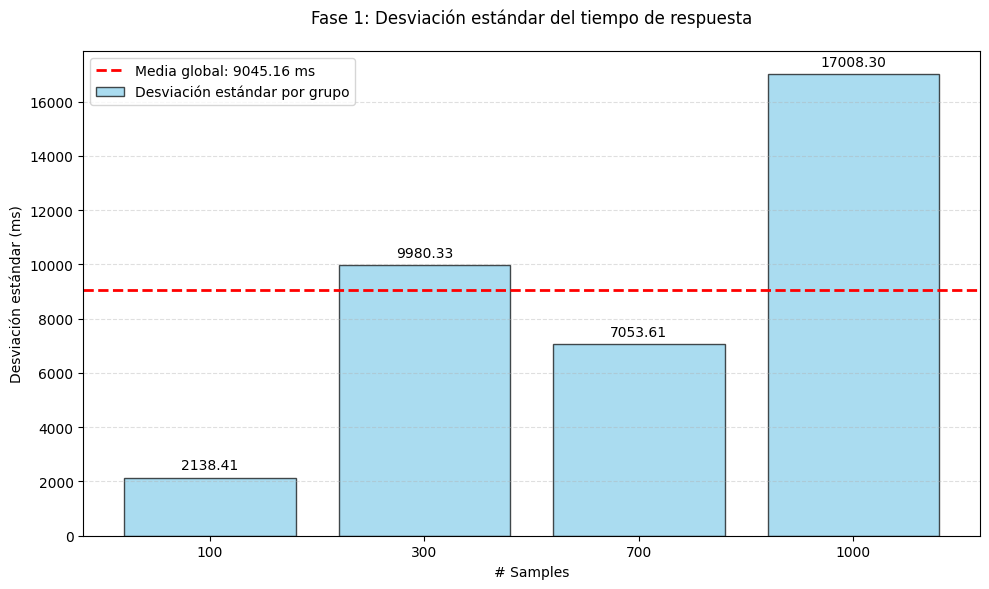

In [7]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

df = df[df['Fase'] == 1]

# Calcular la media global de la desviaci√≥n est√°ndar
mean_std = df['Std. Dev.'].mean()

# Crear gr√°fico
plt.figure(figsize=(10, 6))

# Gr√°fico de barras
bars = plt.bar(
    x=df['# Samples'].astype(str),
    height=df['Std. Dev.'],
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    label='Desviaci√≥n est√°ndar por grupo'
)

# L√≠nea horizontal para la media global
plt.axhline(
    y=mean_std,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Media global: {mean_std:.2f} ms'
)

# A√±adir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 200,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Personalizaci√≥n
plt.title('Fase 1: Desviaci√≥n est√°ndar del tiempo de respuesta', pad=20)
plt.xlabel('# Samples')
plt.ylabel('Desviaci√≥n est√°ndar (ms)')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## **Promedio de Error segun cantidad de muestras**

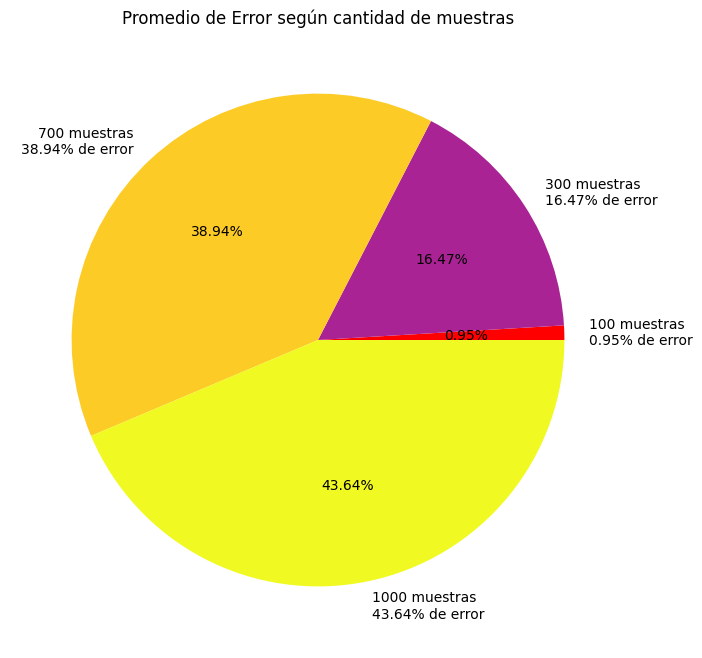

In [8]:
# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

# Limpiar y convertir la columna 'Error %' a tipo num√©rico
df['Error %'] = df['Error %'].astype(str).str.strip().str.replace('%', '', regex=False)
df['Error %'] = pd.to_numeric(df['Error %'], errors='coerce')

# Agrupar por cantidad de muestras y calcular el promedio del % de error
grouped_avg_error = df.groupby('# Samples')['Error %'].mean()

# Crear la gr√°fica de pastel
plt.figure(figsize=(8, 8))
colors = plt.cm.plasma(grouped_avg_error / grouped_avg_error.max())

# Convertir colors a lista para poder modificarlo
colors = list(colors)

# Obtener los valores y etiquetas en orden consistente
values = list(grouped_avg_error.values()) if isinstance(grouped_avg_error, dict) else grouped_avg_error.to_numpy()
labels = list(grouped_avg_error.keys()) if isinstance(grouped_avg_error, dict) else grouped_avg_error.index

# Encontrar el √≠ndice del m√≠nimo error (asegurando que sea un √≠ndice num√©rico v√°lido)
indice_menor_error = np.argmin(values)

# Cambiar el color de esa porci√≥n a ROJO
colors[indice_menor_error] = [1, 0, 0, 1]  # Rojo puro

total = sum(values)
plt.pie(values,
        labels=[f"{samples} muestras\n{(val/total)*100:.2f}% de error"
                for samples, val in zip(labels, values)],
        autopct='%1.2f%%',
        colors=colors)

plt.title('Promedio de Error seg√∫n cantidad de muestras')
plt.show()

## **Throughput y tiempo de respuesta por n√∫mero de muestras**

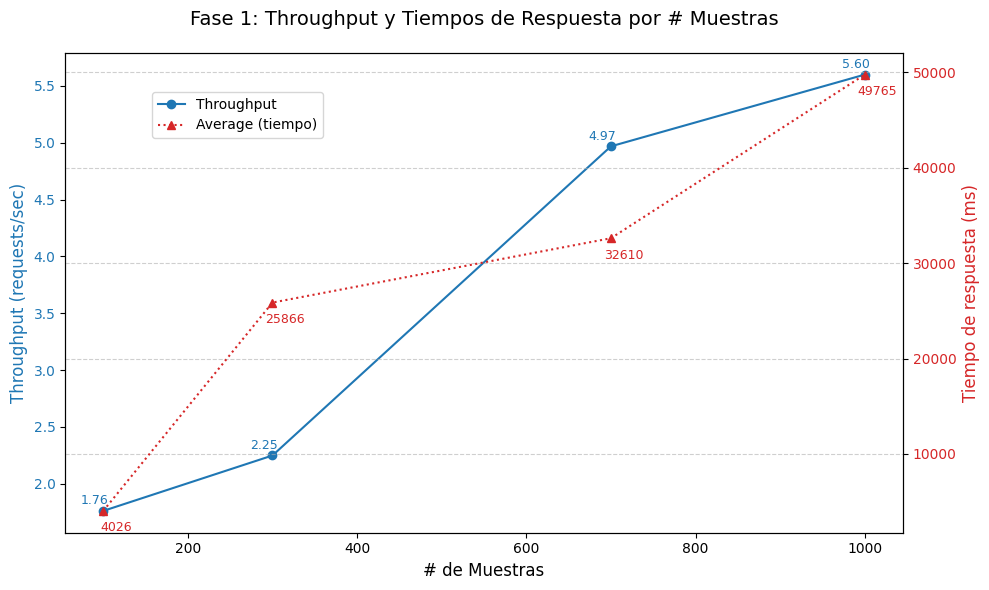

In [9]:
# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

# Filtrar solo los datos de la Fase 1
fase_1 = df[df['Fase'] == 1]

# Agrupar por '# Samples' y calcular promedios
grouped = fase_1.groupby('# Samples').agg({
    'Throughput': 'mean',
    'Average': 'mean'
}).sort_index()

# Crear figura con doble eje
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje Y izquierdo (Throughput)
ax1.set_xlabel('# de Muestras', fontsize=12)
ax1.set_ylabel('Throughput (requests/sec)', color='tab:blue', fontsize=12)
ax1.plot(grouped.index, grouped['Throughput'],
         marker='o', linestyle='-', color='tab:blue', label='Throughput')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Eje Y derecho (Tiempos de respuesta)
ax2 = ax1.twinx()
ax2.set_ylabel('Tiempo de respuesta (ms)', color='tab:red', fontsize=12)
ax2.plot(grouped.index, grouped['Average'],
         marker='^', linestyle=':', color='tab:red', label='Average (tiempo)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# T√≠tulo y leyendas
plt.title('Fase 1: Throughput y Tiempos de Respuesta por # Muestras', fontsize=14, pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

for x, y in zip(grouped.index, grouped['Throughput']):
    ax1.text(x-10, y + 0.03, f'{y:.2f}',
             ha='center', va='bottom', color='tab:blue', fontsize=9)


for x, y in zip(grouped.index, grouped['Average']):
    ax2.text(x + 15, y - 1100, f'{y:.0f}',
             ha='center', va='top', color='tab:red', fontsize=9)

# Ajustar m√°rgenes para evitar cortes
plt.tight_layout()
plt.show()

## **An√°lisis de los resultados**

En esta primera fase, se realizaron pruebas utilizando una √∫nica r√©plica del servicio en Docker, incrementando progresivamente la cantidad de solicitudes recibidas. Los resultados muestran que tanto el tiempo de respuesta como la tasa de errores aumentan conforme se incrementa el n√∫mero de peticiones.

Este comportamiento se vuelve especialmente evidente a partir de las 300 muestras, donde el tiempo de respuesta se multiplic√≥ aproximadamente por seis en comparaci√≥n con las pruebas previas. Esto evidencia una limitada capacidad del sistema para manejar cargas elevadas.

Asimismo, los errores tambi√©n aumentan proporcionalmente con la cantidad de solicitudes, lo que indica que el software requiere m√°s tiempo para procesar y responder correctamente. Un flujo constante de peticiones en un corto periodo de tiempo provoca un aumento significativo en la cantidad de fallos, reflejando la necesidad de optimizar la capacidad de procesamiento o escalar el sistema para mantener su rendimiento bajo alta demanda.

# **Fase 2**

## **Comparaci√≥n del Throughput cuando se usan varias replicas**

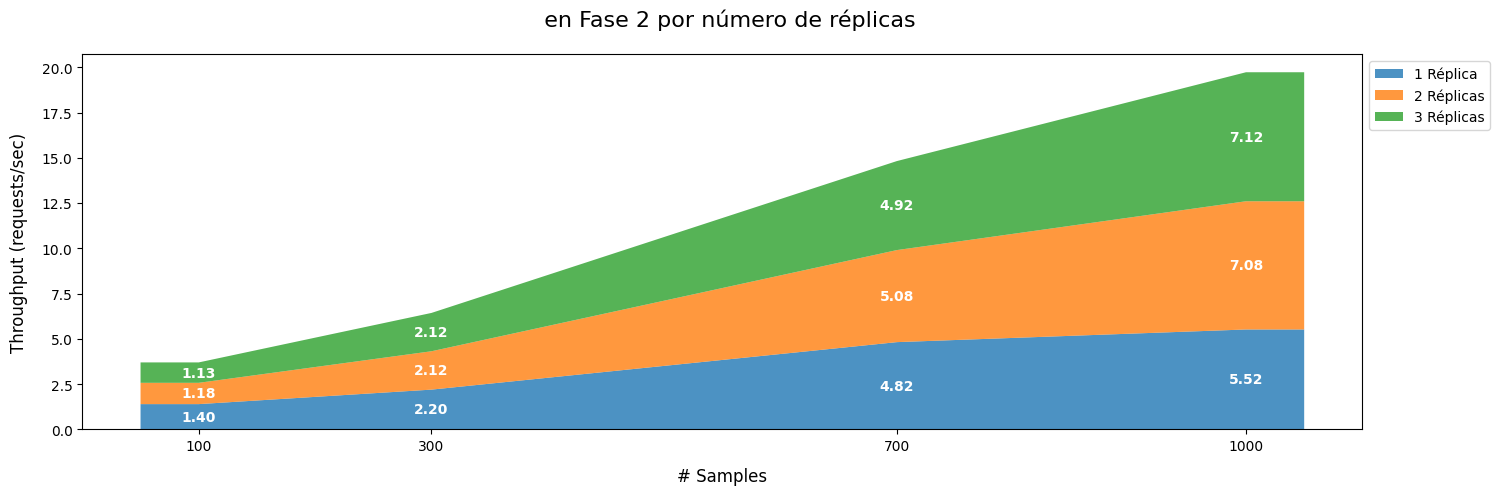

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

# Filtrar solo la Fase 2
fase_2 = df[df['Fase'] == 2]

# Pivotar datos
pivoted = fase_2.pivot_table(
    index='# Samples',
    columns='# Replicas',
    values='Throughput',
    aggfunc='mean'
).sort_index()

# Duplicar primer y √∫ltimo valor con √≠ndices extendidos
step = 50  # Cantidad de desplazamiento artificial
first_index = pivoted.index.min()
last_index = pivoted.index.max()

# Crear nuevas filas para extender el eje
extended = pd.concat([
    pd.DataFrame([pivoted.loc[first_index]], index=[first_index - step]),
    pivoted,
    pd.DataFrame([pivoted.loc[last_index]], index=[last_index + step])
])

# Crear el stackplot
plt.figure(figsize=(16, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Stackplot con los valores extendidos
plt.stackplot(
    extended.index,
    extended[1], extended[2], extended[3],
    labels=['1 R√©plica', '2 R√©plicas', '3 R√©plicas'],
    colors=colors,
    alpha=0.8
)

plt.title('  en Fase 2 por n√∫mero de r√©plicas', fontsize=16, pad=20)
plt.xlabel('# Samples', fontsize=12, labelpad=10)
plt.ylabel('Throughput (requests/sec)', fontsize=12, labelpad=10)
plt.xticks(pivoted.index, fontsize=10)
plt.yticks(fontsize=10)

# Etiquetas de texto solo sobre los datos originales (no los extendidos)
for samples in pivoted.index:
    for i, replica in enumerate([1, 2, 3], start=1):
        y_value = pivoted.loc[samples, replica]
        y_position = y_value / 2 if i == 1 else pivoted.loc[samples, :i].sum() - y_value / 2
        plt.text(
            samples, y_position,
            f'{y_value:.2f}',
            ha='center',
            va='center',
            color='white',
            fontweight='bold'
        )

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.show()

## **Comparaci√≥n del % de Error por cada replica**

### **Funcion para crear las graficas**

In [11]:
def calculo_de_error(df):
  # Limpiar y convertir la columna 'Error %' a tipo num√©rico
  df['Error %'] = df['Error %'].astype(str).str.strip().str.replace('%', '', regex=False)
  df['Error %'] = pd.to_numeric(df['Error %'], errors='coerce')

  # Agrupar por cantidad de muestras y calcular el promedio del % de error
  grouped_avg_error = df.groupby('# Samples')['Error %'].mean()

  # Crear la gr√°fica de pastel
  plt.figure(figsize=(8, 8))
  colors = plt.cm.plasma(grouped_avg_error / grouped_avg_error.max())

  # Convertir colors a lista para poder modificarlo
  colors = list(colors)

  # Obtener los valores y etiquetas en orden consistente
  values = list(grouped_avg_error.values()) if isinstance(grouped_avg_error, dict) else grouped_avg_error.to_numpy()
  labels = list(grouped_avg_error.keys()) if isinstance(grouped_avg_error, dict) else grouped_avg_error.index

  # Encontrar el √≠ndice del m√≠nimo error (asegurando que sea un √≠ndice num√©rico v√°lido)
  indice_menor_error = np.argmin(values)

  # Cambiar el color de esa porci√≥n a ROJO
  colors[indice_menor_error] = [1, 0, 0, 1]  # Rojo puro

  total = sum(values)
  plt.pie(values,
          labels=[f"{samples} muestras\n{(val/total)*100:.2f}% de error"
                  for samples, val in zip(labels, values)],
          autopct='%1.2f%%',
          colors=colors)

  plt.title('Promedio de Error seg√∫n cantidad de muestras')
  plt.show()

### **Para una Replica**

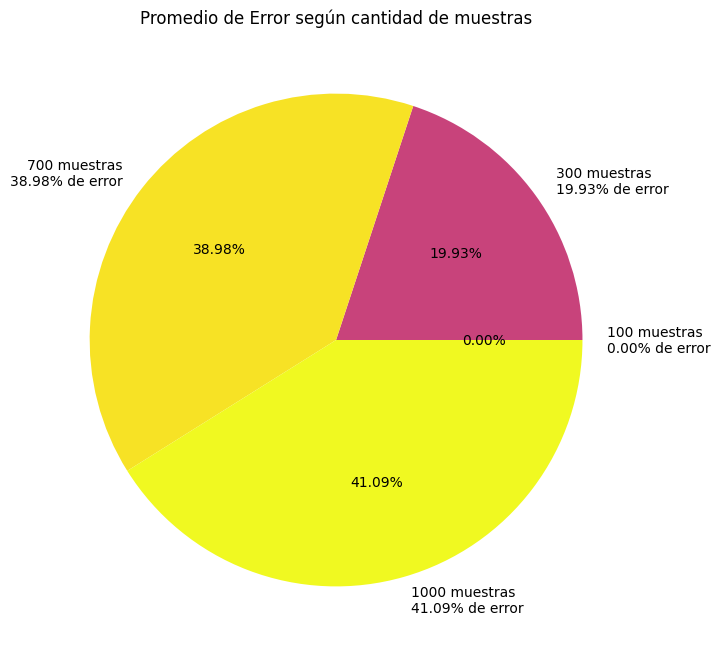

In [12]:
# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

fase_1 = df[df['Fase'] == 2]
fase_1 = fase_1[fase_1['# Replicas'] == 1]

calculo_de_error(fase_1)

### **Para dos Replicas**

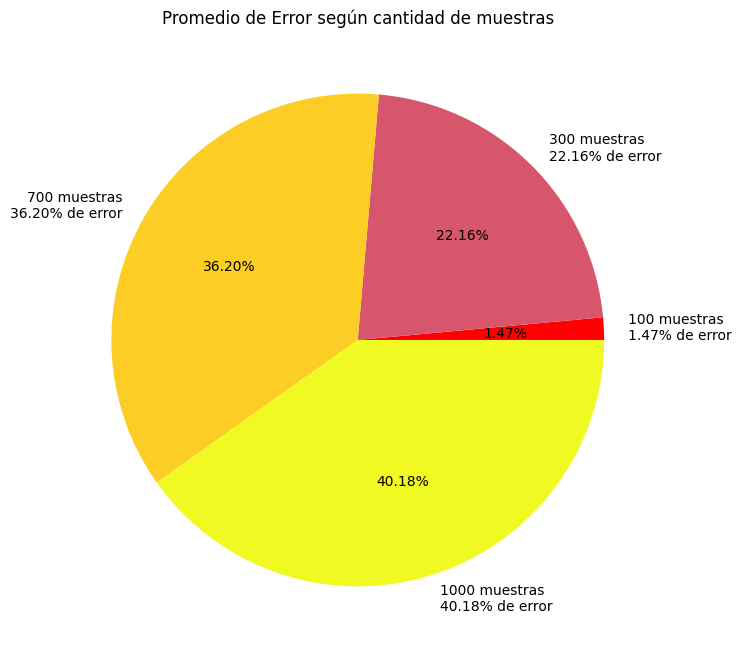

In [13]:
# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

fase_2 = df[df['Fase'] == 2]
fase_2 = fase_2[fase_2['# Replicas'] == 2]

calculo_de_error(fase_2)

### **Para tres Replicas**

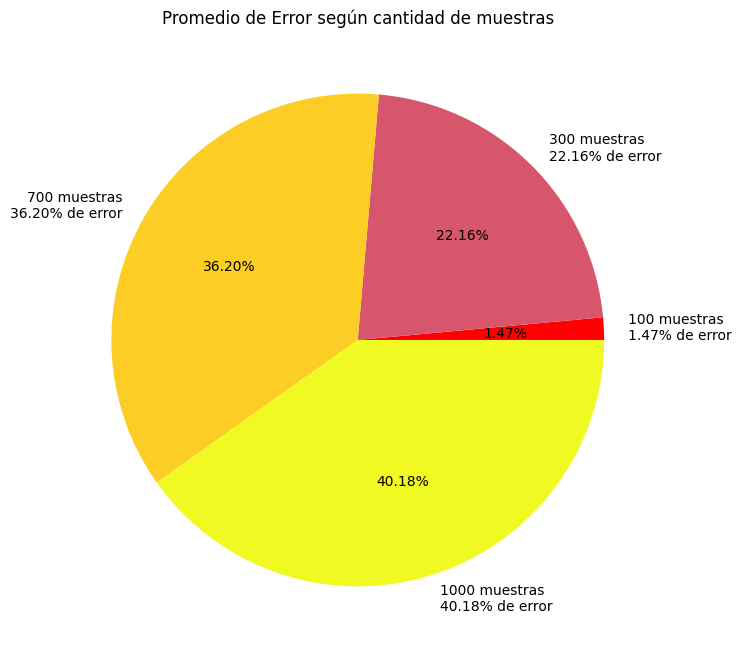

In [14]:
# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

fase_3 = df[df['Fase'] == 2]
fase_3 = fase_3[fase_3['# Replicas'] == 3]

calculo_de_error(fase_2)

## **Comparaci√≥n de Throughput y Tiempo promedio de respuesta por Replica**

### **Funcion para crear las graficas**

In [15]:
def graficas_replicas(fase_1, num_fase):
  # Filtrar solo los datos de la Fase 1


  # Agrupar por '# Samples' y calcular promedios
  grouped = fase_1.groupby('# Samples').agg({
      'Throughput': 'mean',
      'Average': 'mean'
  }).sort_index()

  # Crear figura con doble eje
  fig, ax1 = plt.subplots(figsize=(10, 6))

  # Eje Y izquierdo (Throughput)
  ax1.set_xlabel('# de Muestras', fontsize=12)
  ax1.set_ylabel('Throughput (requests/sec)', color='tab:blue', fontsize=12)
  ax1.plot(grouped.index, grouped['Throughput'],
          marker='o', linestyle='-', color='tab:blue', label='Throughput')
  ax1.tick_params(axis='y', labelcolor='tab:blue')

  # Eje Y derecho (Tiempos de respuesta)
  ax2 = ax1.twinx()
  ax2.set_ylabel('Tiempo de respuesta (ms)', color='tab:red', fontsize=12)
  ax2.plot(grouped.index, grouped['Average'],
          marker='^', linestyle=':', color='tab:red', label='Average (tiempo)')
  ax2.tick_params(axis='y', labelcolor='tab:red')

  # T√≠tulo y leyendas
  plt.title(f'Fase {num_fase}: Throughput y Tiempos de Respuesta por # Muestras', fontsize=14, pad=20)
  fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85), fontsize=10)
  plt.grid(True, linestyle='--', alpha=0.6)

  for x, y in zip(grouped.index, grouped['Throughput']):
      ax1.text(x-10, y + 0.03, f'{y:.2f}',
              ha='center', va='bottom', color='tab:blue', fontsize=9)


  for x, y in zip(grouped.index, grouped['Average']):
      ax2.text(x + 15, y - 1100, f'{y:.0f}',
              ha='center', va='top', color='tab:red', fontsize=9)

  # Ajustar m√°rgenes para evitar cortes
  plt.tight_layout()
  plt.show()

### **Para una replica**

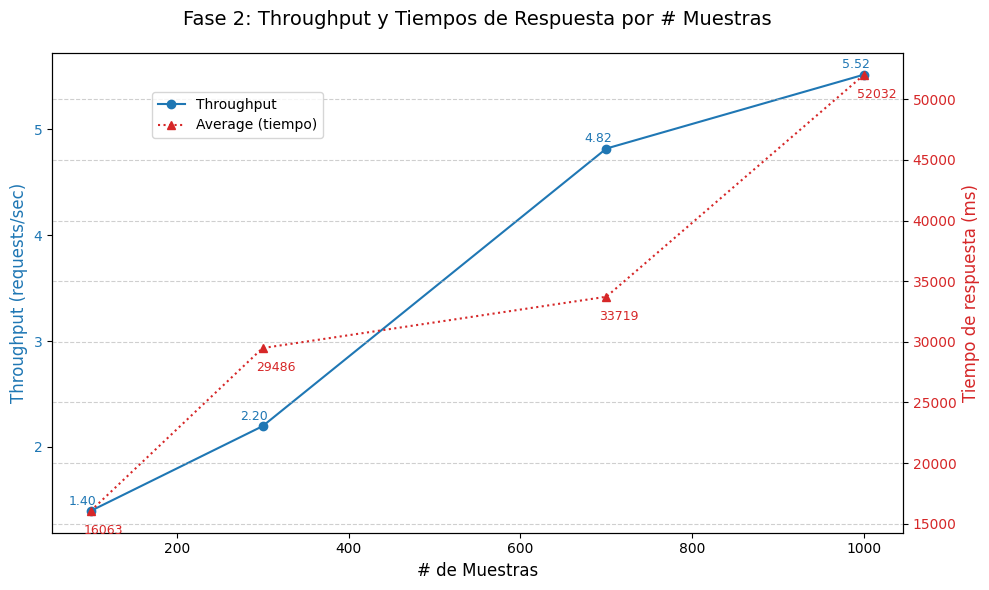

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')
fase_1 = df[df['Fase'] == 2]
fase_1 = fase_1[fase_1['# Replicas'] == 1]

graficas_replicas(fase_1, 2)

### **Para dos Replicas**

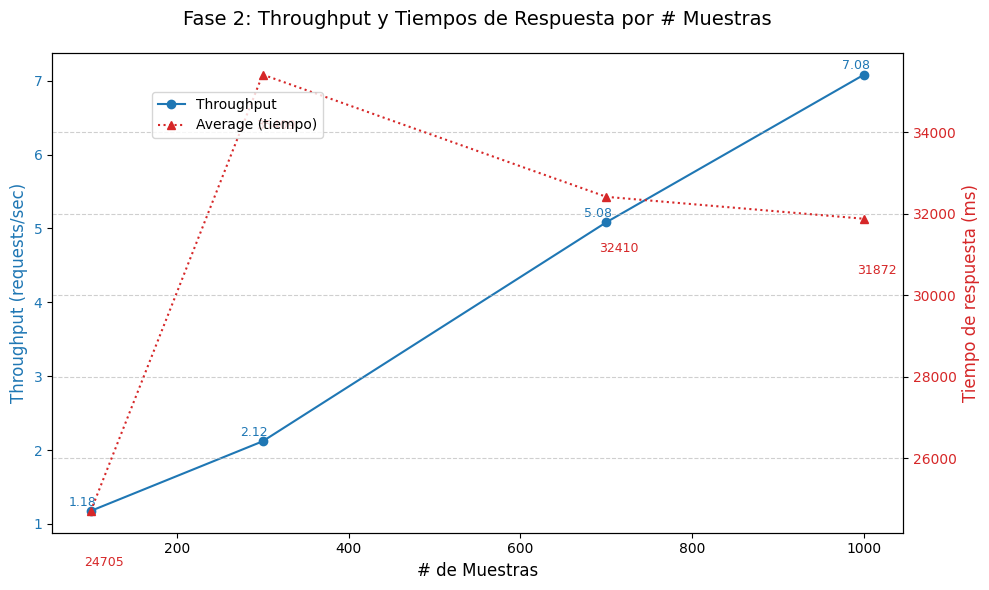

In [17]:
fase_2 = df[df['Fase'] == 2]
fase_2 = fase_2[fase_2['# Replicas'] == 2]

graficas_replicas(fase_2, 2)

### **Para tres Replicas**

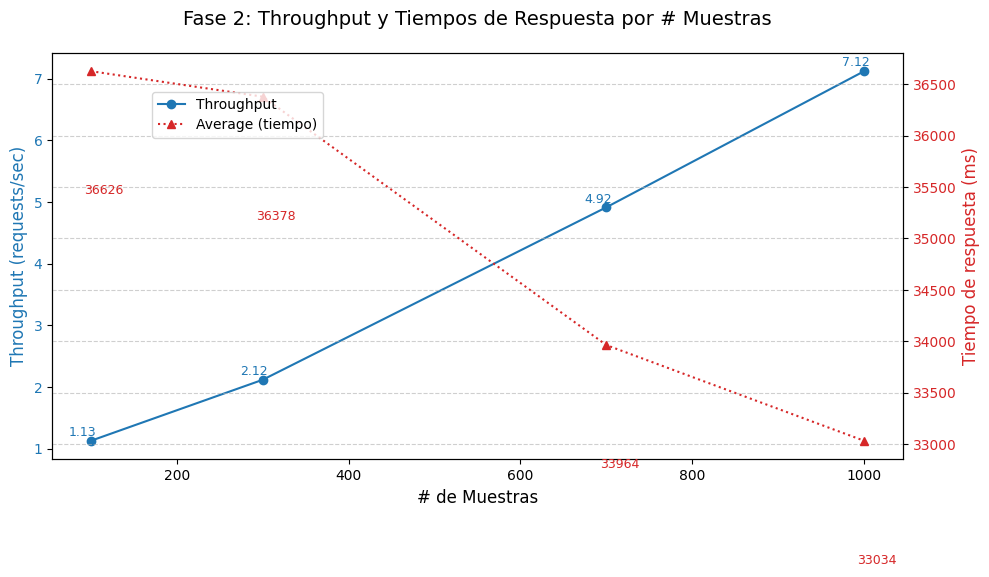

In [18]:
fase_3 = df[df['Fase'] == 2]
fase_3 = fase_3[fase_3['# Replicas'] == 3]

graficas_replicas(fase_3, 2)

## **An√°lisis de los resultados**

Para esta fase, se realizaron tres pruebas siguiendo el mismo procedimiento anterior, pero con una diferencia clave: en cada una se increment√≥ el n√∫mero de r√©plicas del software. El objetivo fue evaluar si el manejo de carga mejoraba o no al aumentar el n√∫mero de r√©plicas disponibles.

En primer lugar, se observa un comportamiento irregular del throughput a medida que se incrementa el n√∫mero de r√©plicas. Entre las 100 y 300 peticiones, se presenta una disminuci√≥n en la tasa de respuesta. Al llegar a 700 peticiones, se aprecia una variaci√≥n notable: el throughput mejora al pasar de una a dos r√©plicas, pero disminuye nuevamente al agregar una tercera r√©plica.

En el caso de las 1000 peticiones, se evidencia una mejora progresiva en la tasa de respuesta a medida que se incrementa el n√∫mero de r√©plicas, lo cual contrasta con el comportamiento anterior. Esta irregularidad tambi√©n se ve reflejada en la tasa de errores, que tiende a aumentar progresivamente no solo con el n√∫mero de r√©plicas, sino tambi√©n con la cantidad de solicitudes realizadas.

El tiempo de respuesta muestra un patr√≥n similar. Con una sola r√©plica, este aumenta conforme crece el n√∫mero de peticiones. No obstante, con dos r√©plicas, se detecta un aumento abrupto del tiempo de respuesta a las 300 peticiones, seguido de una reducci√≥n significativa al aumentar a 700 y 1000 solicitudes. Por su parte, con tres r√©plicas, el tiempo de respuesta es considerablemente mayor en los primeros escenarios de 100 y 300 peticiones, pero disminuye cuando se alcanza un mayor volumen de solicitudes.

Estos resultados dejan en evidencia que aumentar el n√∫mero de r√©plicas no siempre conduce a una mejora en el rendimiento. Es fundamental determinar cu√°ntas r√©plicas son necesarias en funci√≥n de la carga real del sistema. Cuando el n√∫mero de r√©plicas excede los requerimientos del software, el servicio puede ser incapaz de distribuir eficientemente la carga, generando as√≠ resultados adversos.

# **Fase 3**

### **Comparaci√≥n de Throughput cuando se trabaja con varias replicas**

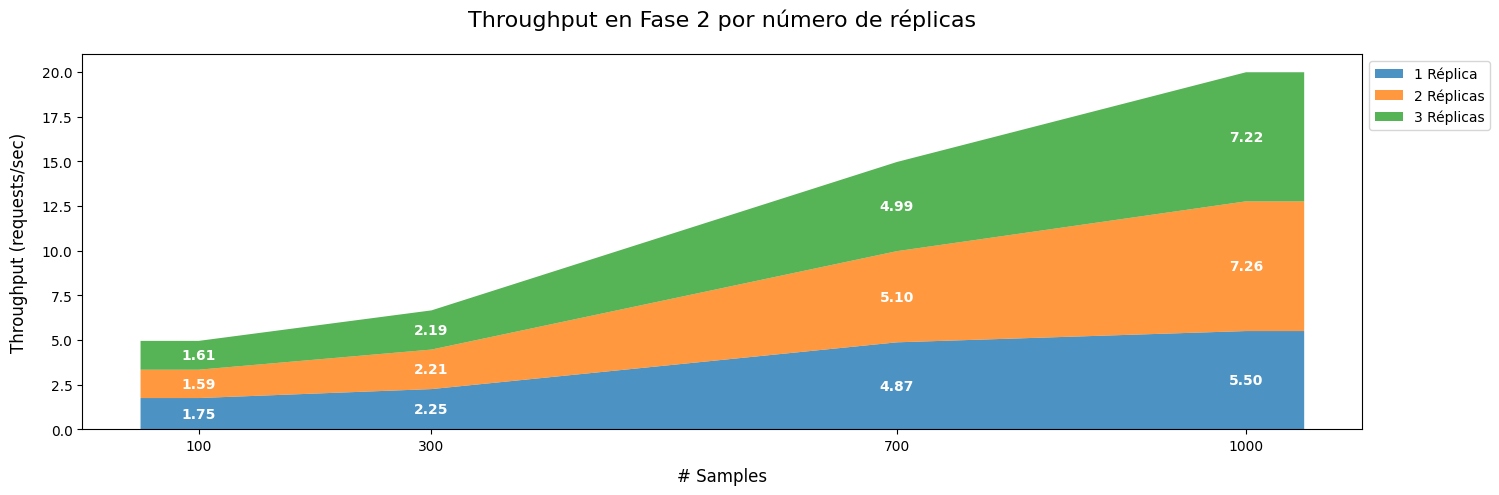

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

# Filtrar solo la Fase 2
fase_2 = df[df['Fase'] == 3]

# Pivotar datos
pivoted = fase_2.pivot_table(
    index='# Samples',
    columns='# Replicas',
    values='Throughput',
    aggfunc='mean'
).sort_index()

# Duplicar primer y √∫ltimo valor con √≠ndices extendidos
step = 50  # Cantidad de desplazamiento artificial
first_index = pivoted.index.min()
last_index = pivoted.index.max()

# Crear nuevas filas para extender el eje
extended = pd.concat([
    pd.DataFrame([pivoted.loc[first_index]], index=[first_index - step]),
    pivoted,
    pd.DataFrame([pivoted.loc[last_index]], index=[last_index + step])
])

# Crear el stackplot
plt.figure(figsize=(16, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Stackplot con los valores extendidos
plt.stackplot(
    extended.index,
    extended[1], extended[2], extended[3],
    labels=['1 R√©plica', '2 R√©plicas', '3 R√©plicas'],
    colors=colors,
    alpha=0.8
)

plt.title('Throughput en Fase 2 por n√∫mero de r√©plicas', fontsize=16, pad=20)
plt.xlabel('# Samples', fontsize=12, labelpad=10)
plt.ylabel('Throughput (requests/sec)', fontsize=12, labelpad=10)
plt.xticks(pivoted.index, fontsize=10)
plt.yticks(fontsize=10)

# Etiquetas de texto solo sobre los datos originales (no los extendidos)
for samples in pivoted.index:
    for i, replica in enumerate([1, 2, 3], start=1):
        y_value = pivoted.loc[samples, replica]
        y_position = y_value / 2 if i == 1 else pivoted.loc[samples, :i].sum() - y_value / 2
        plt.text(
            samples, y_position,
            f'{y_value:.2f}',
            ha='center',
            va='center',
            color='white',
            fontweight='bold'
        )

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.show()

## **Comparaci√≥n del % de Error por cada replica**

### **Funcion para crear las graficas**

In [20]:
def calculo_de_error(df):
  # Limpiar y convertir la columna 'Error %' a tipo num√©rico
  df['Error %'] = df['Error %'].astype(str).str.strip().str.replace('%', '', regex=False)
  df['Error %'] = pd.to_numeric(df['Error %'], errors='coerce')

  # Agrupar por cantidad de muestras y calcular el promedio del % de error
  grouped_avg_error = df.groupby('# Samples')['Error %'].mean()

  # Crear la gr√°fica de pastel
  plt.figure(figsize=(8, 8))
  colors = plt.cm.plasma(grouped_avg_error / grouped_avg_error.max())

  # Convertir colors a lista para poder modificarlo
  colors = list(colors)

  # Obtener los valores y etiquetas en orden consistente
  values = list(grouped_avg_error.values()) if isinstance(grouped_avg_error, dict) else grouped_avg_error.to_numpy()
  labels = list(grouped_avg_error.keys()) if isinstance(grouped_avg_error, dict) else grouped_avg_error.index

  # Encontrar el √≠ndice del m√≠nimo error (asegurando que sea un √≠ndice num√©rico v√°lido)
  indice_menor_error = np.argmin(values)

  # Cambiar el color de esa porci√≥n a ROJO
  colors[indice_menor_error] = [1, 0, 0, 1]  # Rojo puro

  total = sum(values)
  plt.pie(values,
          labels=[f"{samples} muestras\n{(val/total)*100:.2f}% de error"
                  for samples, val in zip(labels, values)],
          autopct='%1.2f%%',
          colors=colors)

  plt.title('Promedio de Error seg√∫n cantidad de muestras')
  plt.show()

### **Para una Replica**

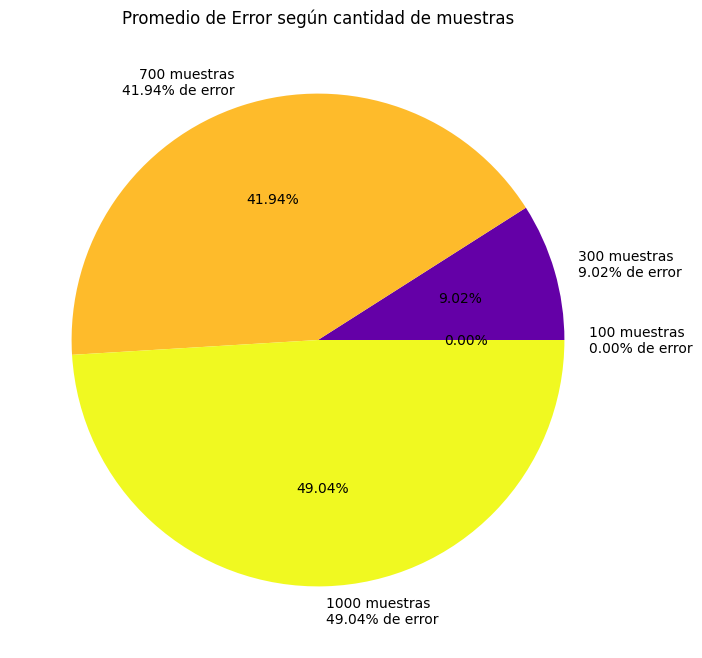

In [21]:
# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

fase_1 = df[df['Fase'] == 3]
fase_1 = fase_1[fase_1['# Replicas'] == 1]

calculo_de_error(fase_1)

### **Para dos Replicas**

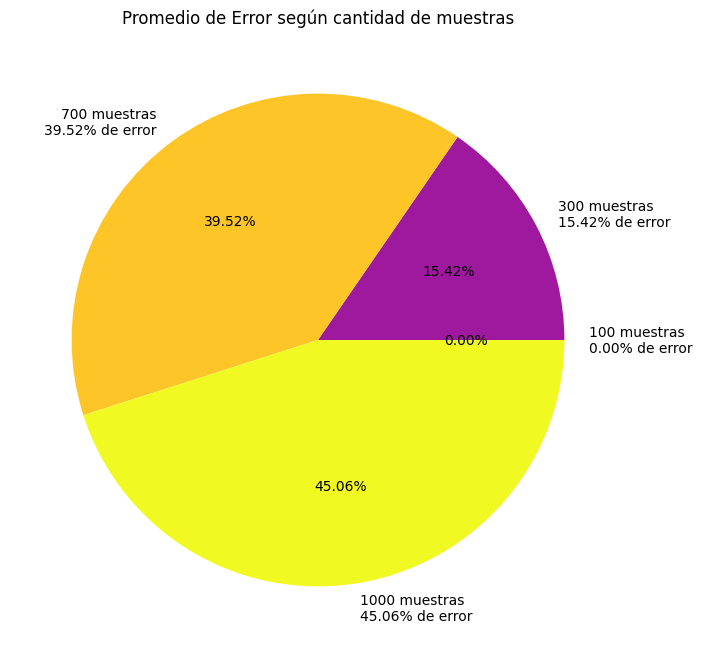

In [22]:
# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

fase_2 = df[df['Fase'] == 3]
fase_2 = fase_2[fase_2['# Replicas'] == 2]

calculo_de_error(fase_2)

### **Para tres Replicas**

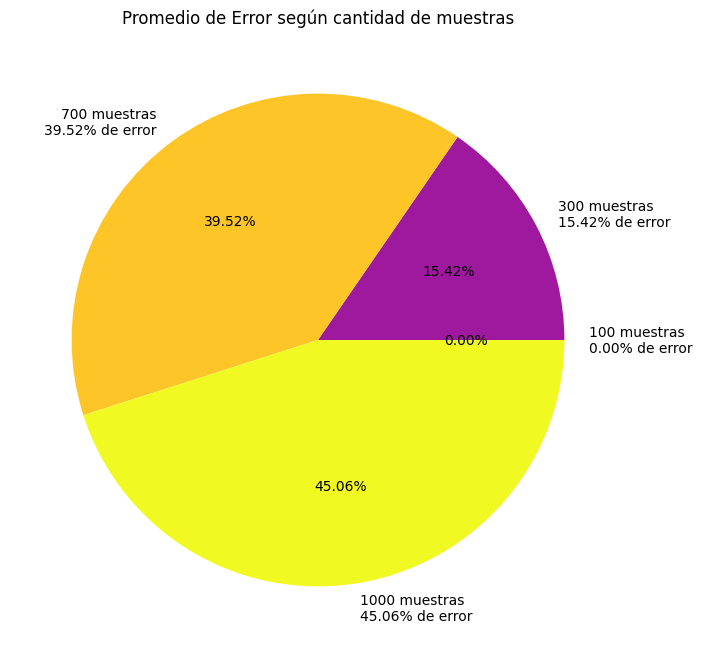

In [23]:
# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')

fase_3 = df[df['Fase'] == 3]
fase_3 = fase_3[fase_3['# Replicas'] == 3]

calculo_de_error(fase_2)

## **Comparaci√≥n de Throughput y Tiempo promedio de respuesta por Replica**

### **Funcion para crear las graficas**

In [24]:
def graficas_replicas(fase_1, num_fase):
  # Filtrar solo los datos de la Fase 1


  # Agrupar por '# Samples' y calcular promedios
  grouped = fase_1.groupby('# Samples').agg({
      'Throughput': 'mean',
      'Average': 'mean'
  }).sort_index()

  # Crear figura con doble eje
  fig, ax1 = plt.subplots(figsize=(10, 6))

  # Eje Y izquierdo (Throughput)
  ax1.set_xlabel('# de Muestras', fontsize=12)
  ax1.set_ylabel('Throughput (requests/sec)', color='tab:blue', fontsize=12)
  ax1.plot(grouped.index, grouped['Throughput'],
          marker='o', linestyle='-', color='tab:blue', label='Throughput')
  ax1.tick_params(axis='y', labelcolor='tab:blue')

  # Eje Y derecho (Tiempos de respuesta)
  ax2 = ax1.twinx()
  ax2.set_ylabel('Tiempo de respuesta (ms)', color='tab:red', fontsize=12)
  ax2.plot(grouped.index, grouped['Average'],
          marker='^', linestyle=':', color='tab:red', label='Average (tiempo)')
  ax2.tick_params(axis='y', labelcolor='tab:red')

  # T√≠tulo y leyendas
  plt.title(f'Fase {num_fase}: Throughput y Tiempos de Respuesta por # Muestras', fontsize=14, pad=20)
  fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85), fontsize=10)
  plt.grid(True, linestyle='--', alpha=0.6)

  for x, y in zip(grouped.index, grouped['Throughput']):
      ax1.text(x-10, y + 0.03, f'{y:.2f}',
              ha='center', va='bottom', color='tab:blue', fontsize=9)


  for x, y in zip(grouped.index, grouped['Average']):
      ax2.text(x + 15, y - 1100, f'{y:.0f}',
              ha='center', va='top', color='tab:red', fontsize=9)

  # Ajustar m√°rgenes para evitar cortes
  plt.tight_layout()
  plt.show()

### **Para una replica**

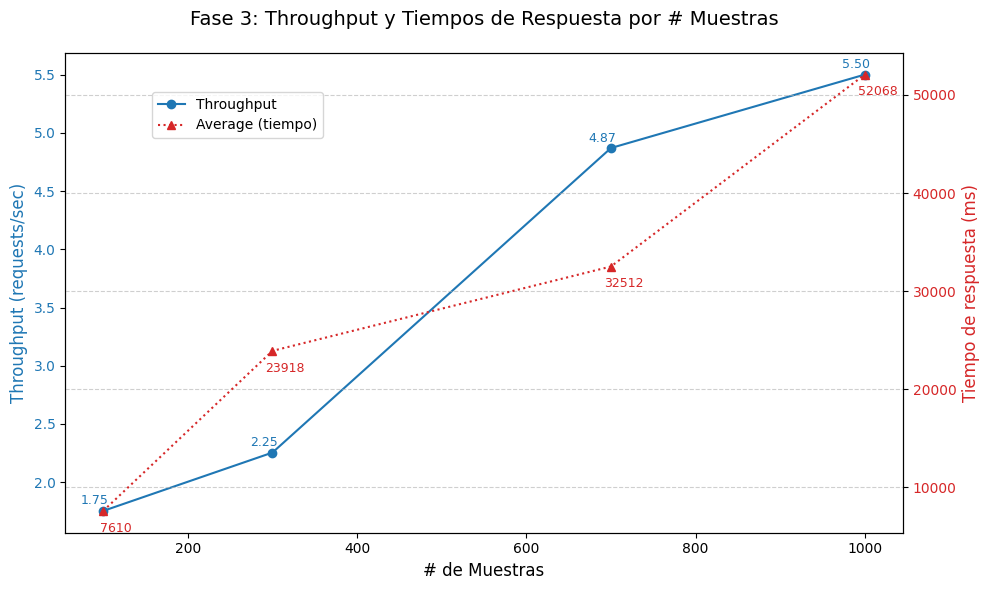

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/JuanRoa785/PF-Software-III/main/Jmeter/resultadosTratados.csv')
fase_1 = df[df['Fase'] == 3]
fase_1 = fase_1[fase_1['# Replicas'] == 1]

graficas_replicas(fase_1, 3)

### **Para dos Replicas**

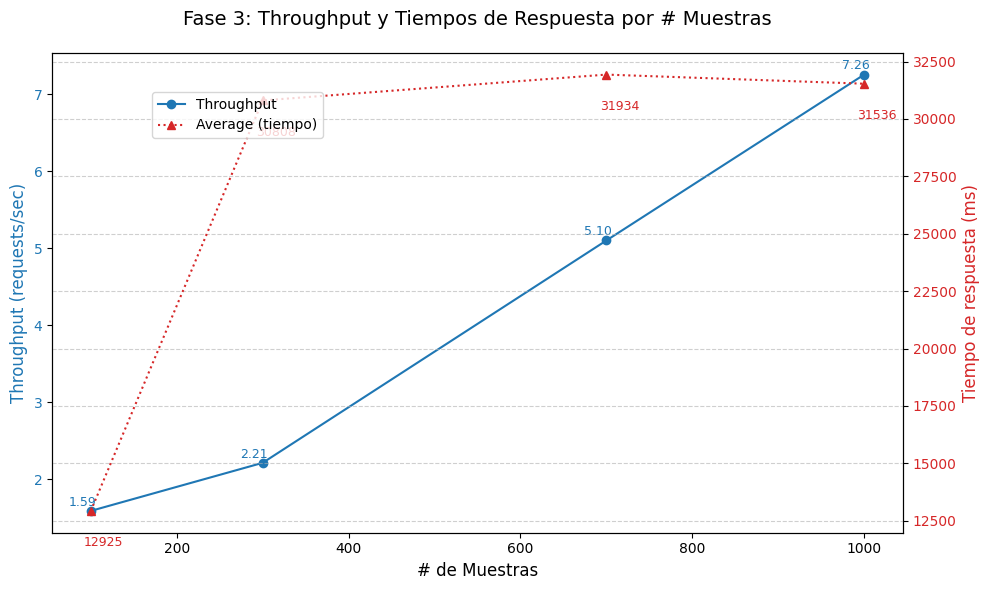

In [26]:
fase_2 = df[df['Fase'] == 3]
fase_2 = fase_2[fase_2['# Replicas'] == 2]

graficas_replicas(fase_2, 3)

### **Para tres Replicas**

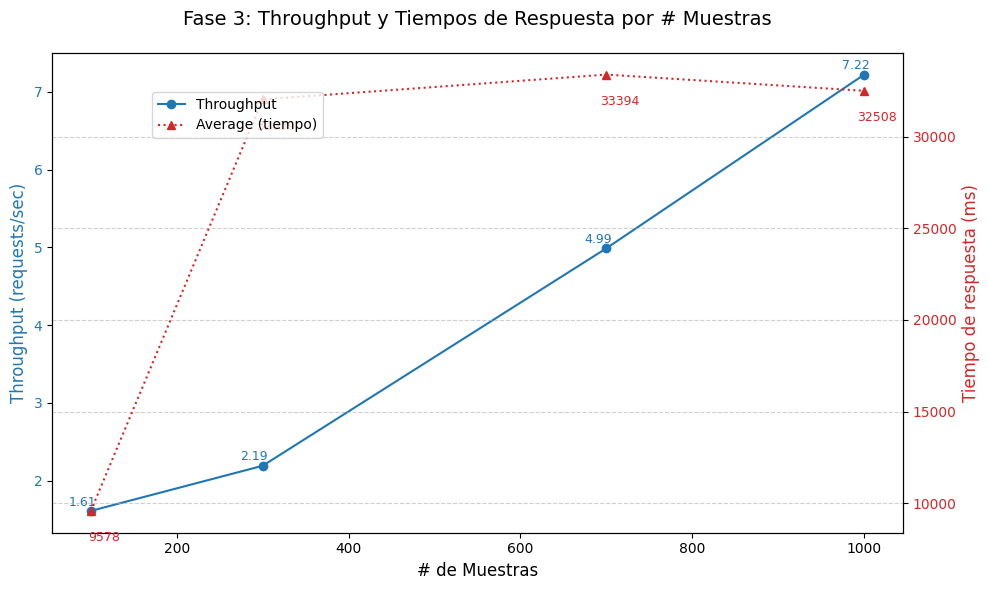

In [27]:
fase_3 = df[df['Fase'] == 3]
fase_3 = fase_3[fase_3['# Replicas'] == 3]

graficas_replicas(fase_3, 3)

## **An√°lisis de los resultados**

Para esta prueba se sigui√≥ el mismo procedimiento que en las dos fases anteriores. En este caso, al utilizar dos nodos y variar el n√∫mero de r√©plicas, se observa que en las primeras 100 y 300 solicitudes hay una disminuci√≥n clara del throughput a medida que se incrementa el n√∫mero de r√©plicas. Sin embargo, al llegar a las 700 y 1000 solicitudes, el throughput mejora al pasar de una a dos r√©plicas, pero vuelve a disminuir al incorporar una tercera r√©plica.

En cuanto a la tasa de errores, se presenta un comportamiento diferente. Para las 100 solicitudes, el error se mantiene constante independientemente del n√∫mero de r√©plicas. En el caso de las 300 solicitudes, la tasa de error aumenta al pasar de una a dos r√©plicas, pero se estabiliza al a√±adir una tercera. Para 700 y 1000 peticiones, se observa una disminuci√≥n significativa del error al pasar de una a dos r√©plicas, manteni√©ndose luego constante con tres r√©plicas.

Respecto al tiempo de respuesta, en esta tercera fase se presenta un patr√≥n similar al observado en la fase anterior para una sola r√©plica: el tiempo de respuesta aumenta progresivamente con el n√∫mero de peticiones. En los escenarios con dos y tres r√©plicas, se aprecia un incremento abrupto del tiempo entre las 100 y 300 solicitudes, seguido por un aumento m√°s moderado a las 700 y una leve disminuci√≥n al alcanzar las 1000 solicitudes.

Esta fase revela una problem√°tica similar a la de la fase 2: los tiempos de respuesta son m√°s elevados con una menor cantidad de solicitudes, independientemente de si se emplea una, dos o tres r√©plicas. Esto sugiere que Kubernetes enfrenta mayores dificultades para distribuir eficientemente la carga cuando los recursos disponibles exceden la demanda real del software en un entorno con dos nodos. Se refuerza as√≠ la importancia de conocer las necesidades del sistema para asignar los recursos adecuados en funci√≥n de la carga esperada, evitando tanto el subdimensionamiento como el sobredimensionamiento.

# **Conclusi√≥n**

Las pruebas de carga realizadas al software bajo diferentes condiciones evidencian la importancia de conocer con precisi√≥n la demanda que tendr√° nuestra aplicaci√≥n para poder asignar los recursos adecuados. Si esto no se considera, la incorporaci√≥n de m√°s nodos o r√©plicas no solo puede resultar ineficaz, sino que tambi√©n podr√≠a generar un aumento en el tiempo de respuesta y en la tasa de errores.

Uno de los hallazgos clave de las pruebas es que, ante una mayor demanda de recursos, resulta m√°s eficiente emplear una arquitectura con dos nodos y tres r√©plicas. Este enfoque no solo reduce el tiempo de respuesta en todos los escenarios evaluados (100, 300, 700 y 1000 peticiones), sino que tambi√©n mejora el throughput en comparaci√≥n con la configuraci√≥n de un solo nodo con tres r√©plicas.